In [2]:
from skimage import io
from skimage import transform
import skimage
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


In [13]:


def addChannels (i1):
    r = i1[:,:,0]
    g = i1[:,:,1]
    b = i1[:,:,2]
    nir = i1[:,:,3]
    evi = 2.5 * (nir - r) / (nir + 6 * r - 7.5 * b + 1)
    ndvi = (nir -r) / (nir.astype('float') + r)
    arvi = (nir - (2*r-b) / (nir.astype('float')+(2*r+b)))
    i1 = np.dstack((i1, evi,ndvi,arvi))
    return(i1)


(256, 256, 4)
(256, 256, 7)
0.0
1.0


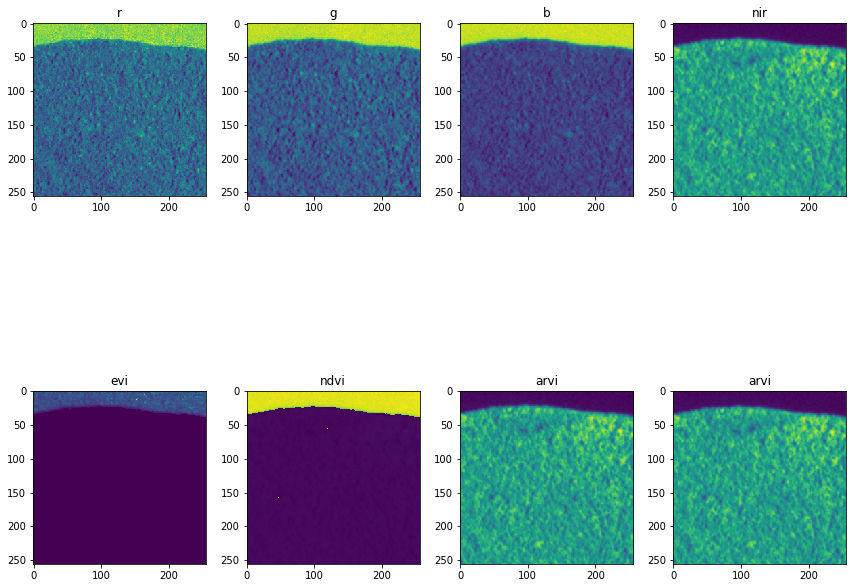

In [19]:

name = 'train_1141'
i1 = io.imread('train-tif/'+name+'.tif') 
print (i1.shape)
i1 = addChannels(i1)
print (i1.shape)


for i in range(0,7):
    i1[:,:,i] = (i1[:,:,i] - np.min(i1[:,:,i])) / (np.max(i1[:,:,i]) - np.min(i1[:,:,i]))

print (np.min(i1))    
print (np.max(i1))    
    
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,12))
#                         sharex=True, sharey=True)

ax = axes.ravel()

#ax[0].imshow(irgb)
#ax[0].set_title("rgb")
ax[0].imshow(i1[:,:,0])
ax[0].set_title("r")
ax[1].imshow(i1[:,:,1])
ax[1].set_title("g")
ax[2].imshow(i1[:,:,2])
ax[2].set_title("b")
ax[3].imshow(i1[:,:,3])
ax[3].set_title("nir")
ax[4].imshow(i1[:,:,4])
ax[4].set_title("evi")
ax[5].imshow(i1[:,:,5])
ax[5].set_title("ndvi")
ax[6].imshow(i1[:,:,6])
ax[6].set_title("arvi")
ax[7].imshow(i1[:,:,6])
ax[7].set_title("arvi")


plt.tight_layout()
plt.show()